# Towards Machine Learning in Supply Chain Forecasting
* [part 1](https://www.datahubbs.com/towards-machine-learning-in-supply-chain-forecasting-1/)
  * 沒有什麼重要內容

* [part 2](https://www.datahubbs.com/towards-machine-learning-in-supply-chain-forecasting-part-2/)
  ### Simple forecasting methods
  * [Naive forecast](#Naive-forecast): The previous period's demand = the next period's demand
    * $\hat{y}_{t+h} = y_{t}$
    * 就是 $\hat{y}($明天$) = y($今天$)$
  * [Seasonal Naive](#Seasonal-naive):
    * $\hat{y}_{t+h|t} = y_{t+h-km}$, where $k = \frac{h-1}{m} + 1$ 表示 number of period to lag，$m$ 是 seasonal period
    * 就是 $\hat{y}($明天$) = y($上個週期的同一天$)$，例如: 預測今年的耶誕節=去年的耶誕節
  * [Average Forecast](#Average-forecast)
    * $\hat{y}_{t+h|t} = \bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_{t}$
    * 就是 $\hat{y}($明天$) = y_{測試集的平均值}$
  * [Drift Method](#Drift-method)
    * $\hat{y}_{t+h|t} = y_{t} + h \frac{y_{t} - y_{1}}{t - t_{0}}$
    * 是 naive forecast 的變形，train 可能有一些趨勢 (有斜率)，所以就把預測的部分加上這個趨勢
  * [Linear Regression](#Linear-regression)
    * $\hat{y}_{t+h|t} = \sum_{i=1}^{n} \theta^{T} \cdot t$
    * 藉由調整權重 $\theta$ 來把誤差最小化

* [part 3](https://www.datahubbs.com/machine-learning-supply-chain-forecasting-3/)
  ### Classical decomposition
  * Trend: 長期的趨勢，整體的傾向
  * Seasonal: 週期性重複出現的 pattern，有 regular interval
  * Cycle: 非週期性的 pattern，沒有 regular interval
  * Noise: fluctuation 或 variation
    * 又叫做 residual 或是 irregularity
  * Trend ($T_{t}$), seasonal ($S_{t}$), cycle ($C_{t}$) 是可以預測的，noise ($\epsilon_{t}$) 不能預測
  * Parametric method: 
    * Additive models: $y_{t} = T_{t} + S_{t} + C_{t} + \epsilon_{t}$
      * 4 個成份加到一起
    * Multiplicative models: $y_{t} = T_{t} \times S_{t} \times C_{t} \times \epsilon_{t}$
      * 4 個成份乘到一起
  * Seasonal ratio (SR): $SR = \frac{y_{t}}{MVA}$
    * MVA: Moving average
  * Unadjusted seasonal index (USI): 就是 SR 的平均值
    * $USI_{i} = \overline{SR}_{i}$
    * 用數據中不同週期同一時段的資料，例如把每個年份的一月份的資料拿出來，然後用這些資料的 SR 來算平均值
    * 一個週期中，不同時段的資料通通要拿來計算 USI，例如計算每個月份的 USI
  * Adjusted seasonal index (ASI): 就是 USI 的平均值
    * $S'_{i} = \frac{USI_{i}}{\overline{USI}}$
  * 一般來說不會單獨看 Trend ($T_{t}$) 而是 Trend-cycle ($T'=T_{t} \times C_{t}$ 或 $T_{t} + C_{t}$) 一起看
    * $\hat{T}'$ 可以用 regression model 來做 fitting 和 prediction 得到
    * 用 Multiplicative models 的話，要先移除 seasonality 之後再看 trend
  * Noise 可以這麼計算: $\epsilon_{t}' = \frac{1}{n} \frac{y_{t}}{T'S'}$
  * 預測結果 $\hat{y} = \hat{T}'_{t} \times S'_{t} \times \epsilon'$
  * Additive model 的流程:
    * 先 fit $T' = T_{t} + C_{t}$
    * De-trend: $y_{t-T'} = y_{t} - T'$
    * 算 MVA, 然後求 $S'$
    * 算平均 noise: $\epsilon' = \frac{1}{n} \cdot (y_{t} - S'_{t} - T'_{t})$
    * 用 regression model 預測 $\hat{T}'$
    * 加起來得結果: $\hat{y} = \hat{T}' + S' + \epsilon'$
  * Multiplicative models 的流程:
    * 求 MVA 算 SR 然後算 $S'$
    * 移除 seasonality: $y_{t-s} = \frac{y_{t}}{S'} = T_{t} \times C_{t} \times \epsilon_{t}$
    * 然後用 regression model 來求 $T'$ 和預測 $\hat{T}'$
    * Noise: $\epsilon_{t}' = \frac{1}{n} \frac{y_{t}}{T'S'}$
    * 最後成起來得結果: $\hat{y} = \hat{T}' \times S' \times \epsilon'$

* [part 4](https://www.datahubbs.com/forecasting-with-seasonality/)
  ### Exponential smoothing
  * 越接近現在的資料越重要 (權重大)，越古早的資料越不重要 (權重小)
  * Simple exponential smoothing
    * $\hat{y}_{t+1|T} = \sum_{i=0}^{T-1}\alpha(1-\alpha)^{i}y_{i-1}$
      * $\alpha$: smoothing parameter, $0 < \alpha < 1$ 
        * $\alpha$ 值越大，decay 越快。越接近 1 就是近期的結果越重要，越接近 0 就是過去的結果的重要性增加。
        * $\alpha=1 \rightarrow$ naive forecast
    * Stationary models (就是沒有 trend 和 seasonality 的成分) 時才適用
  * Holt's Method
    * 是 non-stationary model，藉由引入 linear model ($y = mx + b$) 來把 trend 加入考慮
    * $\hat{y}_{t+h|t}=\hat{a}_{t} + h\hat{b}_{t}$
      * $\hat{a}_{t}$: estimated level at time $t$
      * $h$: time horizon
      * $\hat{b}_{t}$: estimated trend
  * Double exponential smoothing
  * Holt-Winter's Method


* [part 5](https://www.datahubbs.com/how-to-use-deep-reinforcement-learning-to-improve-your-supply-chain/)


### 常見的 Metrics
* error: $e_{i} = y_{i} - \hat{y}_{i}$
* Mean absolute error (MAE): \begin{equation*}MAE = \frac{\sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|}{n}\end{equation*}
* RMSE: \begin{equation*}RMSE=\sqrt{\frac{\sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}{n}}\end{equation*}
  * 因為取了平方，較大的誤差會有較大的 punish
  * RMSE 是scale dependent metrics，只能用來比較相同 scale 的東西
* Mean absolute percentage error (MAPE): \begin{equation*}MAPE = 100 \times \frac{\sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|}{\sum_{i=1}^{n} y_{i}}\end{equation*}
  * MAEP 是 scale independent metrics
  * weighted MAPE:  \begin{equation*}wMAPE = 100 \times \frac{\sum_{i=1}^{n} w\cdot|y_{i} - \hat{y}_{i}|}{\sum_{i=1}^{n} y_{i}}\end{equation*}
    * weighted MAPE 適合 demand forecast
    * 要怎麼決定 weight 是很主觀的，所以要看情況而定

## Part 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
%matplotlib inline

# load dataset
# url = "https://www.datahubbs.com/wp-content/uploads/2017/03/timeseries.csv"
# df = pd.read_csv(url)
df = pd.read_csv("/Users/ytshen/Desktop/Machine_Learning/datasets/timeseries.csv")
# convert date to datetime
df["date"] = pd.to_datetime(df["date"])
display(df.head())

# Train test split
# 使用前 75% 的資料當作訓練集
# 時間序列不可以使用隨機的 75% 因為要用歷史數據來預測未來
n = len(df)
train_count = round(n * 0.75)
df_train = df.iloc[: train_count] # 2015-01-01 到 2016-07-01 的資料
df_test = df.iloc[train_count: n] # 2016-07-02 到 2016-12-30 的資料
# display(df_train.head(5))
# display(df_train.tail(5))
# display(df_test.head(5))
# display(df_test.tail(5))

,date,sales
0,2015-01-01,106
1,2015-01-02,122
2,2015-01-03,127
3,2015-01-04,106
4,2015-01-05,89


#### Naive forecast

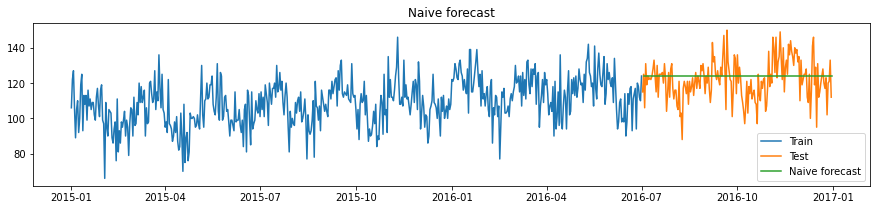

,date,sales,naive,error
0,2016-07-03,125,124,1
1,2016-07-04,106,124,-18
2,2016-07-05,131,124,7
3,2016-07-06,119,124,-5
4,2016-07-07,124,124,0


sales  naive error                               
          sum    sum   sum       MAE       RMSE      MAPE
series                                                   
1       22082  22444  -362  8.895028  11.461683  7.291006

In [37]:
y_hat = df_test.copy().drop("sales", axis=1)
y_hat["date"] = y_hat["date"] + np.timedelta64(1, "D") # 不懂為什麼要加一天，這樣子 y_hat 變成 2016-07-03 到 2016-12-31
y_hat["naive"] = df_train.loc[len(df_train) - 1, "sales"] # 這樣子 y_hat 就等於 train 的最後一天 (2016-07-01) 的數據
# display(y_hat.head())

# 畫圖比較
plt.figure(figsize=(15, 3))
plt.plot(df_train["date"], df_train["sales"], label="Train")
plt.plot(df_test["date"], df_test["sales"], label="Test")
plt.plot(y_hat["date"], y_hat["naive"], label="Naive forecast")
plt.legend(loc="best")
plt.title("Naive forecast")
plt.show()

# 計算 metrics
df_evaluation = pd.merge(df_test, y_hat, on="date")
df_evaluation.columns = ["date", "sales", "naive"]
df_evaluation["error"] = df_evaluation["sales"] - df_evaluation["naive"]
display(df_evaluation.head())

# 把叫做 series 的 column 插入第 0 column，並賦值為 1，這麼做的目的是為了 groupby
df_evaluation.insert(0, "series", 1)
df_metrics = df_evaluation.groupby("series").agg(
    {
        "sales": "sum",
        "naive": "sum",
        "error": [
            "sum", # total error
            lambda x: np.mean(np.abs(x)), # MAE
            lambda x: np.sqrt(np.mean(x ** 2)), # RMSE
            lambda x: 100 * np.sum(np.abs(x) / np.sum(df_evaluation["sales"])) # MAPE
        ]
    }
)
# print(df_metrics.columns)
df_metrics.rename(
    columns={
        "<lambda_0>": "MAE",
        "<lambda_1>": "RMSE",
        "<lambda_2>": "MAPE"
    },
    inplace=True
)
display(df_metrics.head())

#### Seasonal naive

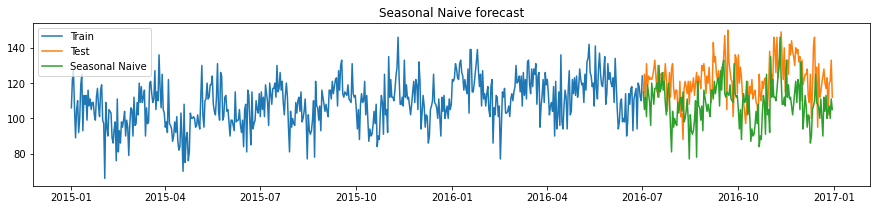

,date,sales,seasonal_naive,error
0,2016-07-02,115,115,0
1,2016-07-03,125,105,20
2,2016-07-04,106,112,-6
3,2016-07-05,131,101,30
4,2016-07-06,119,119,0


sales seasonal_naive error                                 
          sum            sum   sum        MAE       RMSE       MAPE
series                                                             
1       22197          19743  2454  16.802198  19.801765  13.776636

In [47]:
# 把 test 中的日期減去一年，得到去年的同一天
dates = (df_test["date"] - np.timedelta64(1, "Y")).values.astype("datetime64[D]")
seasonal_naive = df_train.loc[df_train["date"].isin(dates), "sales"] # seasonal naive prediction
# seasonal_naive 是一個 series

# 把 seasnoal naive 變成和 df_test 有相同日期的 dataframe
y_hat_sn = df_test.copy().drop("sales", axis=1)
y_hat_sn["seasonal_naive"] = pd.DataFrame(seasonal_naive).set_index(df_test.index)
# display(y_hat_sn.head())

# 畫圖比較
plt.figure(figsize=(15, 3))
plt.plot(df_train["date"], df_train["sales"], label="Train")
plt.plot(df_test["date"], df_test["sales"], label="Test")
plt.plot(y_hat_sn["date"], y_hat_sn["seasonal_naive"], label="Seasonal Naive")
plt.legend(loc="best")
plt.title("Seasonal Naive forecast")
plt.show()

# 計算 metrics
df_evaluation = pd.merge(df_test, y_hat_sn, on="date")
df_evaluation.columns = ["date", "sales", "seasonal_naive"]
df_evaluation["error"] = df_evaluation["sales"] - df_evaluation["seasonal_naive"]
display(df_evaluation.head())

# 把叫做 series 的 column 插入第 0 column，並賦值為 1，這麼做的目的是為了 groupby
df_evaluation.insert(0, "series", 1)
df_metrics = df_evaluation.groupby("series").agg(
    {
        "sales": "sum",
        "seasonal_naive": "sum",
        "error": [
            "sum", # total error
            lambda x: np.mean(np.abs(x)), # MAE
            lambda x: np.sqrt(np.mean(x ** 2)), # RMSE
            lambda x: 100 * np.sum(np.abs(x) / np.sum(df_evaluation["sales"])) # MAPE
        ]
    }
)
# print(df_metrics.columns)
df_metrics.rename(
    columns={
        "<lambda_0>": "MAE",
        "<lambda_1>": "RMSE",
        "<lambda_2>": "MAPE"
    },
    inplace=True
)
display(df_metrics.head())

### Average forecast

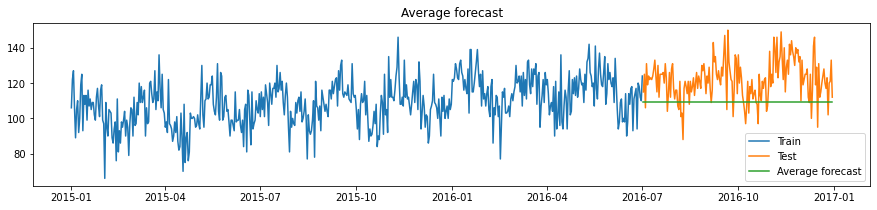

In [49]:
y_hat_avg = df_test.copy().drop("sales", axis=1)
y_hat_avg["avg_forecast"] = df_train["sales"].mean() # 用 train 的平均值當作預測的結果
# display(y_hat_avg.head())

# 畫圖比較
plt.figure(figsize=(15, 3))
plt.plot(df_train["date"], df_train["sales"], label="Train")
plt.plot(df_test["date"], df_test["sales"], label="Test")
plt.plot(y_hat_avg["date"], y_hat_avg["avg_forecast"], label="Average forecast")
plt.legend(loc="best")
plt.title("Average forecast")
plt.show()

### Drift Method

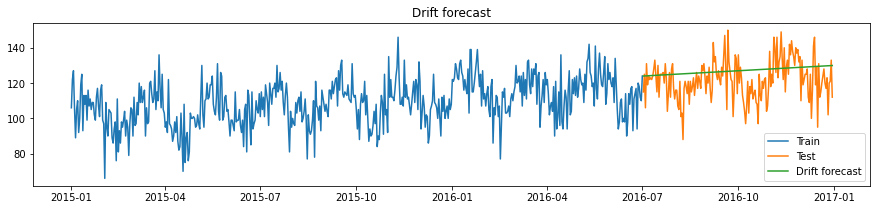

In [66]:
# 取得 train 的斜率
y_t = df_train.loc[len(df_train) - 1, "sales"]
y_0 = df_train.loc[0, "sales"]
m = (y_t - y_0) / len(df_train)

y_hat_drift = df_test.copy().drop("sales", axis=1)
# np.linspace(起點，終點，起點到終點包含終點共分成個幾點) 
h = np.linspace(0, len(y_hat_drift) - 1, len(y_hat_drift)) # 每一個 time step
# print(h)
y_hat_drift["drift_method"] = y_t + m * h
# display(y_hat_drift.head())

# 畫圖比較
plt.figure(figsize=(15, 3))
plt.plot(df_train["date"], df_train["sales"], label="Train")
plt.plot(df_test["date"], df_test["sales"], label="Test")
plt.plot(y_hat_drift["date"], y_hat_drift["drift_method"], label="Drift forecast")
plt.legend(loc="best")
plt.title("Drift forecast")
plt.show()

### Linear Regression

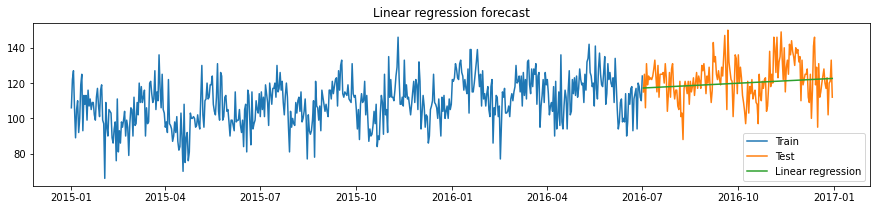

In [69]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# sklearn 不吃日期，所以用 index 就好
# 要把輸入轉成 sklearn 吃的格式, i.e. 2-Dim numpy array
X = np.atleast_2d(df_train.index).T
y = np.atleast_2d(df_train.sales).T
# print(X)
# print(y)

lm.fit(X, y)

y_hat_reg = df_test.copy().drop("sales", axis=1)
y_hat_reg["lin_forecast"] = lm.predict(np.atleast_2d(y_hat_reg.index).T)
# display(y_hat_reg)

# 畫圖比較
plt.figure(figsize=(15, 3))
plt.plot(df_train["date"], df_train["sales"], label="Train")
plt.plot(df_test["date"], df_test["sales"], label="Test")
plt.plot(y_hat_reg["date"], y_hat_reg["lin_forecast"], label="Linear regression")
plt.legend(loc="best")
plt.title("Linear regression forecast")
plt.show()

### Model evaluation

In [121]:
# 比較各個模型的結果
df_evaluation = pd.merge(df_test, y_hat, on="date")\
                  .merge(y_hat_sn, on="date")\
                  .merge(y_hat_avg, on="date")\
                  .merge(y_hat_drift, on="date")\
                  .merge(y_hat_reg, on="date")
# display(df_evaluation.head())

# 把叫做 series 的 column 插入第 0 column，並賦值為 1，這麼做的目的是為了 groupby
df_evaluation.insert(0, "series", 1)

forecast_metric = {
    "sales": "sum",
    "error": [
        "sum",
        lambda x: np.mean(np.abs(x)), # MAE
        lambda x: np.sqrt(np.mean(x ** 2)), # RMSE
        lambda x: 100 * np.sum(np.abs(x) / np.sum(df_evaluation["sales"])) # MAPE
    ]
}

list_of_dfs = [y_hat, y_hat_sn, y_hat_avg, y_hat_drift, y_hat_reg]
names = ["naive", "seasonal_naive", "avg_forecast", "drift_forecast", "lin_forecast"]

list_of_df = []
for df, name in zip(list_of_dfs, names):
    df_temp = pd.merge(df_test, df, on="date")
    df_temp["error"] = df_temp["sales"] - df_temp.iloc[:, 2]
    df_temp.insert(0, "series", 1)
#     display(df_temp.head())
    df_temp = df_temp.groupby("series").agg(forecast_metric)
    df_temp.rename(
        columns={
            "<lambda_0>": "MAE",
            "<lambda_1>": "RMSE",
            "<lambda_2>": "MAPE"
        },
        inplace=True
    )
    df_temp.columns = ["total_sales", "total_error", "MAE", "RMSE", "MAPE"]
    df_temp["Forecast"] = name
    list_of_df.append(df_temp)

df_metric = pd.concat(list_of_df)
# df_metric = df_metric["Forecast", "total_sales", "total_error", "MAE", "RMSE", "MAPE"]
display(df_metric.head())

,total_sales,total_error,MAE,RMSE,MAPE,Forecast
series,,,,,,
1,22082,-362.000000,8.895028,11.461683,7.291006,naive
1,22197,2454.000000,16.802198,19.801765,13.848383,seasonal_naive
1,22197,2356.343066,14.456445,17.162789,11.915012,avg_forecast
1,22197,-912.018248,9.624990,12.216655,7.932924,drift_forecast
1,22197,372.061097,8.940948,11.327988,7.369136,lin_forecast


## Part 3

,y
date,
2013-01-01,16.650798
2013-01-02,6.651429
2013-01-03,16.537404
2013-01-04,19.662590
2013-01-05,6.632995


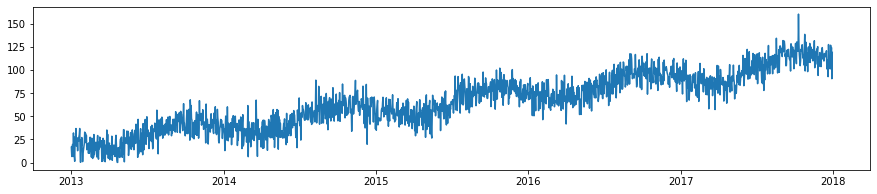

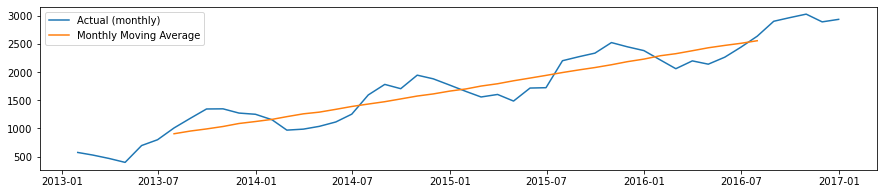

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

# load dataset
# url = "https://www.datahubbs.com/wp-content/uploads/2017/05/decomposition.csv"
# df = pd.read_csv(url)
df = pd.read_csv("/Users/ytshen/Desktop/Machine_Learning/datasets/decomposition.csv", sep=",")
# Label columns
df.columns = ["date", "y"]
# convert date to datetime
df["date"] = pd.to_datetime(df["date"])
# set dates as index
df.set_index("date", inplace=True)
display(df.head())

# 畫圖看分佈
plt.figure(figsize=(15, 3))
plt.plot(df["y"])
plt.show()

# train test split on 2017-01-01
df_train = df.loc[df.index < "2017-01-01"]
df_test = df.loc[df.index >= "2017-01-01"]

# 假設有 monthly seasonality
df_year = pd.DataFrame({"y": df_train["y"].resample("M").sum()})
df_year["monthly_avg"] = df_year["y"].rolling(center=True, window=12).mean()
# display(df_year.head())

# 畫圖看分佈
plt.figure(figsize=(15, 3))
plt.plot(df_year["y"], label="Actual (monthly)")
plt.plot(df_year["monthly_avg"], label="Monthly Moving Average")
plt.legend(loc="best")
plt.show()

### Seasonality

,y,monthly_avg,seasonal_ratio,month
date,,,,
2013-01-31,573.380450,NaN,NaN,1
2014-01-31,1154.344409,1160.131032,0.995012,1
2015-01-31,1654.827521,1701.153082,0.972768,1
2016-01-31,2214.121895,2289.797473,0.966951,1


USI_jan=0.9782436666666666


,y,monthly_avg,seasonal_ratio,month,usi
date,,,,,
2013-01-31,573.380450,NaN,NaN,1,0.978244
2013-02-28,527.714935,NaN,NaN,2,0.858922
2013-03-31,466.634457,NaN,NaN,3,0.867474
2013-04-30,397.257325,NaN,NaN,4,0.829878
2013-05-31,696.166346,NaN,NaN,5,0.884812


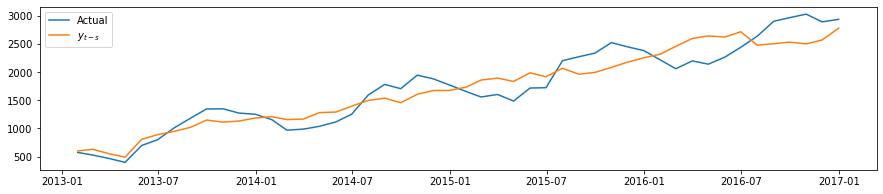

In [22]:
df_year["seasonal_ratio"] = df_year["y"] / df_year["monthly_avg"]

# Add month column
df_year["month"] = df_year.index.month
# display(df_year.head())

# 取出所有一月份的資料來計算 USI
df_jan = df_year.loc[df_year["month"]==1]
display(df_jan)
# 一月份的 USI 就是一月份的 SR 的平均值
USI_jan = (0.995012 + 0.972768 + 0.966951) / 3
print(f"USI_jan={USI_jan}")

# 計算每個月份的 USI
df_usi = df_year.groupby("month").agg({"seasonal_ratio": "mean"}).reset_index()
df_usi.rename(columns={"seasonal_ratio":"usi"}, inplace=True)
# display(df_usi)

# 再把計算出來的每個月的 USI 加入到原本的 df_year 中
df_year = df_year.reset_index()
df_year = pd.merge(df_year, df_usi, on="month").set_index("date").sort_index()
display(df_year.head())


df_year["asi"] =  df_year["usi"] / df_usi["usi"].mean()
df_year["y_t-s"] = df_year["y"] / df_year["asi"]

# 畫圖看分佈
plt.figure(figsize=(15, 3))
plt.plot(df_year["y"], label="Actual")
plt.plot(df_year["y_t-s"], label="$y_{t-s}$")
plt.legend(loc="best")
plt.show()

### Trend

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


,y,monthly_avg,seasonal_ratio,month,usi,asi,y_t-s,trend
date,,,,,,,,
2013-01-31,573.380450,NaN,NaN,1,0.978244,0.954890,600.467805,612.800602
2013-02-28,527.714935,NaN,NaN,2,0.858922,0.838416,629.418718,659.341615
2013-03-31,466.634457,NaN,NaN,3,0.867474,0.846764,551.079528,705.882627
2013-04-30,397.257325,NaN,NaN,4,0.829878,0.810066,490.401026,752.423639
2013-05-31,696.166346,NaN,NaN,5,0.884812,0.863688,806.038710,798.964651


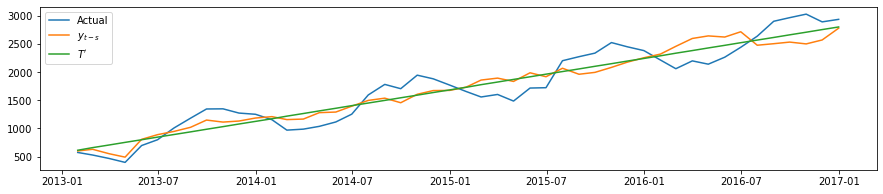

In [23]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=False, fit_intercept=True)
y_t_s = np.atleast_2d(df_year["y_t-s"].values).T
# df_year["y_t-s"].values 是一個 list, 維度是 (48, )
# np.atleast_2d(df_year["y_t-s"].values) 轉成 2 維, 維度變成 (1, 48), 轉置後變成 (48, 1)
x = np.atleast_2d(np.linspace(0, len(df_year) - 1, len(df_year))).T
# len(df_year) = 48, np.linspace(0, len(df_year) - 1, len(df_year)) 就是 0 ~ 47 分成 48等分，剛好是 0 ~ 47 的所有整數
# 本來不該用 x = 0 ~ 47 來做 fitting 因為這不是 data 的 feature，但是因為從上圖看起來 trend 有點線性的感覺
# 所以就假設是線性，然後用 linear regression 並把 x = 0 ~ 47 當作 feature 來用
lm.fit(x, y_t_s)
df_year['trend'] = lm.predict(x)
display(df_year.head())

# 畫圖看分佈
plt.figure(figsize=(15, 3))
plt.plot(df_year["y"], label="Actual")
plt.plot(df_year["y_t-s"], label="$y_{t-s}$")
plt.plot(df_year["trend"], label="$T'$")
plt.legend(loc="best")
plt.show()

### Noise

In [24]:
df_year["noise"] = (df_year["y"] / df_year["asi"] * df_year["trend"]).mean()
display(df_year.head())

,y,monthly_avg,seasonal_ratio,month,usi,asi,y_t-s,trend,noise
date,,,,,,,,,
2013-01-31,573.380450,NaN,NaN,1,0.978244,0.954890,600.467805,612.800602,3.327895e+06
2013-02-28,527.714935,NaN,NaN,2,0.858922,0.838416,629.418718,659.341615,3.327895e+06
2013-03-31,466.634457,NaN,NaN,3,0.867474,0.846764,551.079528,705.882627,3.327895e+06
2013-04-30,397.257325,NaN,NaN,4,0.829878,0.810066,490.401026,752.423639,3.327895e+06
2013-05-31,696.166346,NaN,NaN,5,0.884812,0.863688,806.038710,798.964651,3.327895e+06


### Making a forecast

In [40]:
df_test_year = pd.DataFrame({"y": df_test["y"].resample("M").sum()})
df_test_year["month"] = df_test_year.index.month
display(df_test_year.head())

# get index for trend regression
x_test = np.linspace(len(df_year), len(df_year) + len(df_test_year) - 1, len(df_test_year))
x_test = x_test.reshape(-1, 1) # 把一維的 x_test 轉成二維

# df_pred = pd.merge(df_test_year, df_year[["month", "asi", "noise"]], on="month", right_index=True)
display(df_year.tail())

df_pred["trend"] = lm.predict(x_test)
df_pred["forecast"] = df_pred["trend"] * df_pred["asi"] * df_pred["noise"]
display(df_pred.head())

# 畫圖看分佈
plt.figure(figsize=(15, 3))
plt.plot(df_year["y"], label="Actual Train ($y_t$)")
plt.plot(df_test_year["y"], label="Actual Test ($y_t$)")
plt.plot(df_pred["forecast"], label="Forecast $\hat{y}_{t-s}$")
plt.legend(loc="best")
plt.title("Classical Decomposition and Multiplicative Model Forecast")
plt.show()

# evaluation 評估模型預測的結果好壞
df_evaluation = df_pred.copy()
df_evaluation["error"] = df_evaluation["y"] - df_evaluation["forecast"]
df_evaluation.insert(0, "series", 1) # insert value to groupby
df_evaluation.groupby("series").agg({
    "y": "sum",
    "forecast": "sum",
    "error": {
        "total_error": "sum",
        "percentage_error": lambda x: 100 * np.sum(x) / np.sum(df_evaluation["y"]),
        "mae": lambda x: np.mean(np.abs(x)),
        "rmse": lambda x: np.sqrt(np.mean(x ** 2)),
        "map": lambda x: 100 * np.sum(np.abs(x)) / np.sum(df_evaluation["y"])
    }
}).apply(np.round, axis=1)

,y,month
date,,
2017-01-31,2759.965636,1
2017-02-28,2458.970713,2
2017-03-31,2589.872089,3
2017-04-30,2563.687815,4
2017-05-31,2797.599595,5


,y,monthly_avg,seasonal_ratio,month,usi,asi,y_t-s,trend,noise
date,,,,,,,,,
2016-08-31,2901.183979,NaN,NaN,8,1.187310,1.158964,2503.255412,2614.064123,3.327895e+06
2016-09-30,2965.401014,NaN,NaN,9,1.199914,1.171268,2531.786818,2660.605135,3.327895e+06
2016-10-31,3027.914868,NaN,NaN,10,1.240990,1.211363,2499.592562,2707.146147,3.327895e+06
2016-11-30,2890.542759,NaN,NaN,11,1.152420,1.124908,2569.581716,2753.687159,3.327895e+06
2016-12-31,2935.305745,NaN,NaN,12,1.082192,1.056357,2778.707409,2800.228171,3.327895e+06


## Part 4

,month,sales
0,Jan,10
1,Feb,8
2,Mar,9
3,Apr,14
4,May,12
5,Jun,11


When alpha=0.8, forecast for Jul=11.238400000000002
When alpha=1, forecast for Jul=11


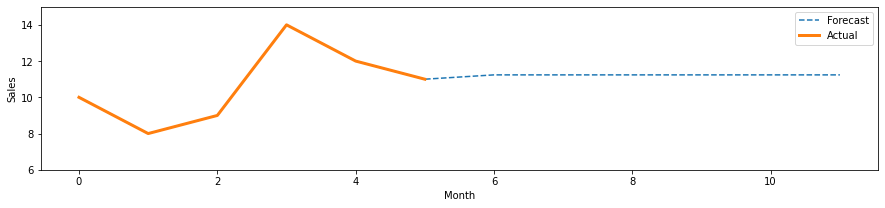

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "sales": [10, 8, 9, 14, 12, 11]
})
display(df)

# 用 exponential smoothing 和過去六個月的 sales 來預測 7 月份的 sales
def exp_smoothing(series, alpha):
    return sum([alpha * (1 - alpha)**i * x for i, x in enumerate(reversed(series))])

alpha=0.8
print(f'When alpha={alpha}, forecast for Jul={exp_smoothing(df["sales"], alpha)}')

alpha=1
print(f'When alpha={alpha}, forecast for Jul={exp_smoothing(df["sales"], alpha)}')

# Extended Horizon: 如果要一直預測下去，那就每次預測的結果加入到 series 中，然後用來預測下一個
sales = df["sales"].tolist()
# print(f"sales={sales}")

forecast_period = 6
alpha = 0.8
for i in range(forecast_period):
    sales.append(exp_smoothing(sales, alpha))
    
# 畫圖看結果
plt.figure(figsize=(15, 3))
plt.plot(sales, "--", label="Forecast")
plt.plot(df["sales"], label="Actual", lw=3)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.ylim([min(sales) - 2, max(sales) + 1])
plt.show()

## Part 5